In [176]:
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

In [2]:
df = pd.read_excel("premiums.xlsx")
print(df.shape)
df.head()

(50000, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [4]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [5]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True) ##in case datasets changes and have duplicates value it still be handled
df.duplicated().sum()

0

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [10]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [12]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

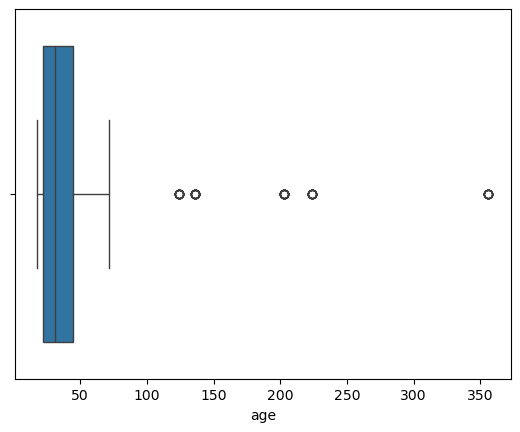

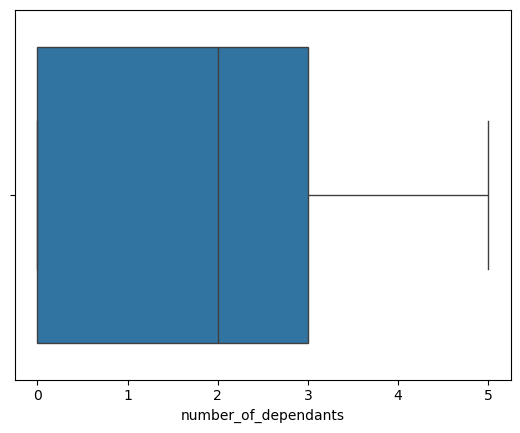

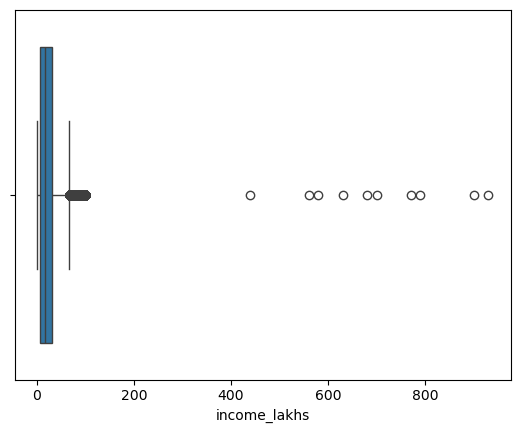

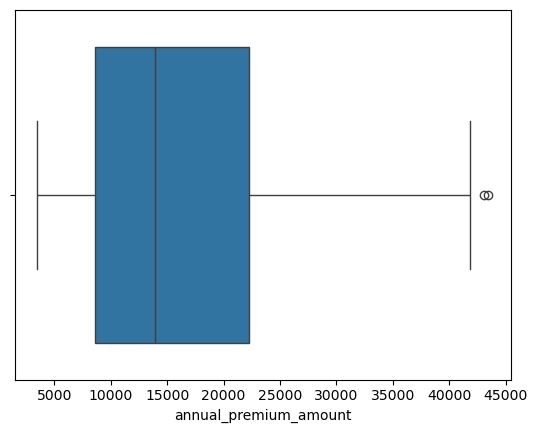

In [13]:
for col in numeric_col:
    sbn.boxplot(x=df[col])
    plt.show()

In [14]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [15]:
df1 = df[df['age']<100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [16]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [17]:
get_iqr_bounds(df1.income_lakhs) ## we can use this upper bond here but can use common sense as well for example just use quantile

(-29.0, 67.0)

In [18]:
income_thre = df1['income_lakhs'].quantile(0.999)
income_thre

100.0

In [19]:
df1[df1['income_lakhs']> income_thre].shape

(10, 13)

In [20]:
df2 = df1[df1['income_lakhs']<income_thre].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49808.000000,49808.000000,49808.000000,49808.000000
mean,34.399333,1.717214,22.735083,15756.332276
std,13.683206,1.492056,21.921788,8417.581174
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8602.000000
50%,31.000000,2.000000,16.000000,13919.000000
75%,45.000000,3.000000,31.000000,22263.250000
max,72.000000,5.000000,99.000000,43471.000000


In [21]:
df2.shape

(49808, 13)

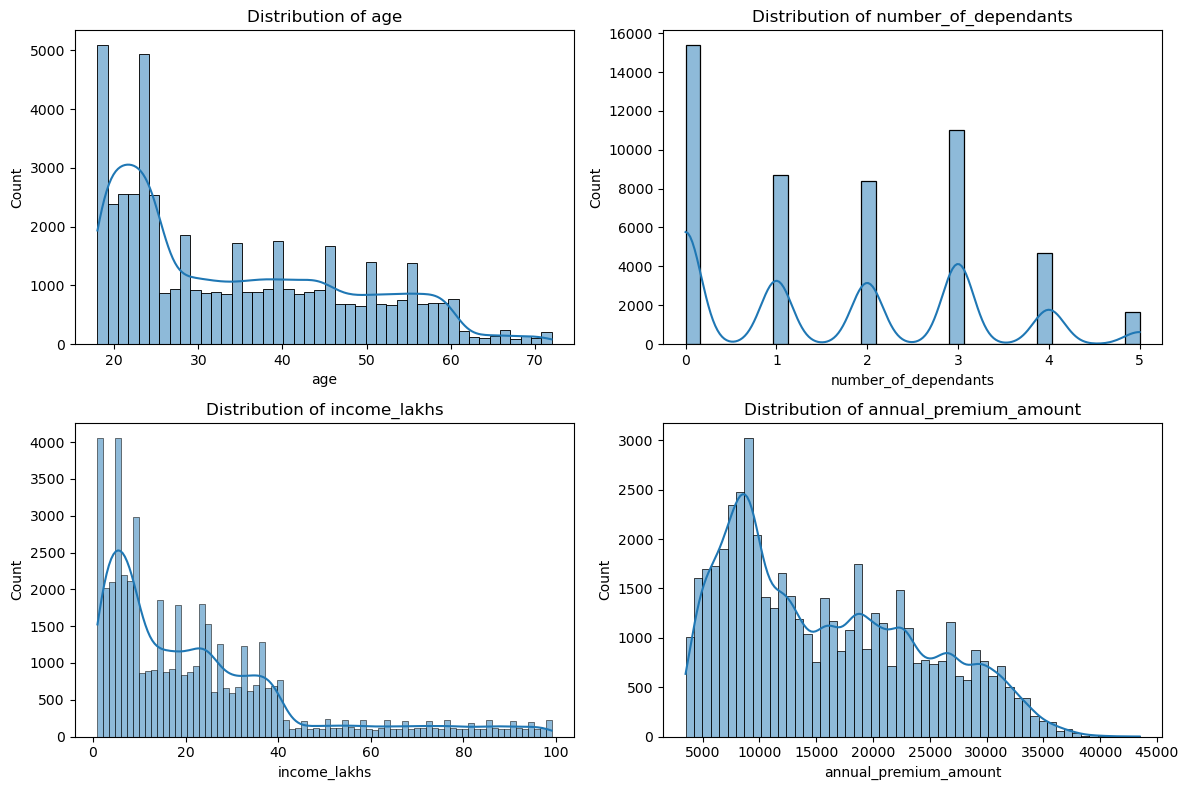

In [22]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy looping
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sbn.histplot(x=df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

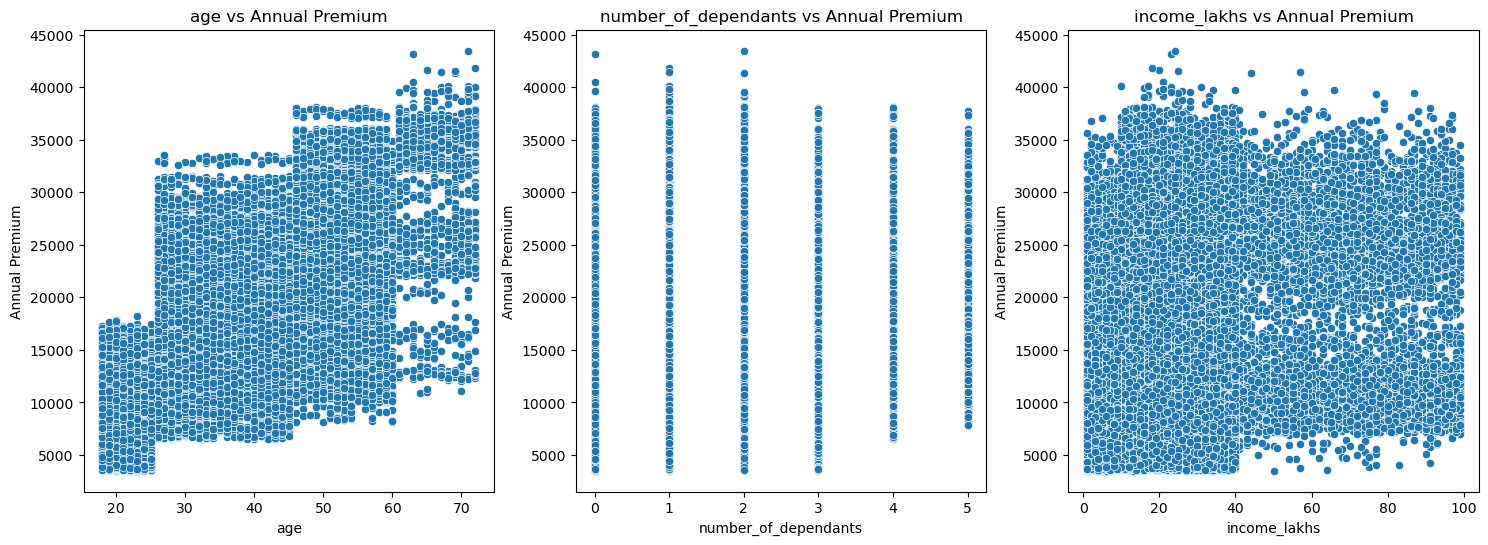

In [50]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18,6))

for ax, col in zip(axes, numeric_features):
    sbn.scatterplot(x=df2[col], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{col} vs Annual Premium')
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium")

plt.show()

In [58]:
cat_col = df.select_dtypes(['object', 'string']).columns
cat_col

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [64]:
for col in cat_col:
    print(col, df[col].unique())

gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [82]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
}, inplace=True)
df2['smoking_status'].unique()

/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_965/321161999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [84]:
pct_gender = df2['gender'].value_counts(normalize=True)
pct_gender

gender
Male      0.54953
Female    0.45047
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

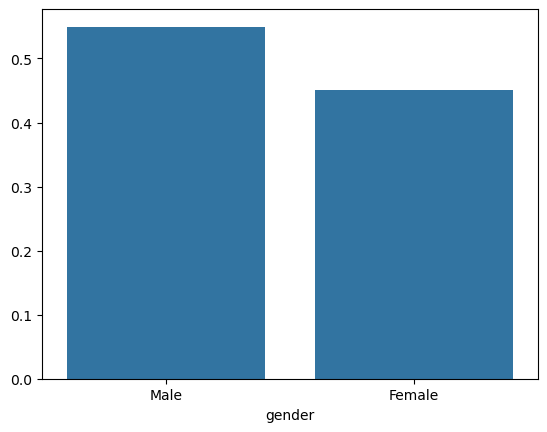

In [86]:
sbn.barplot(x=pct_gender.index, y=pct_gender.values)

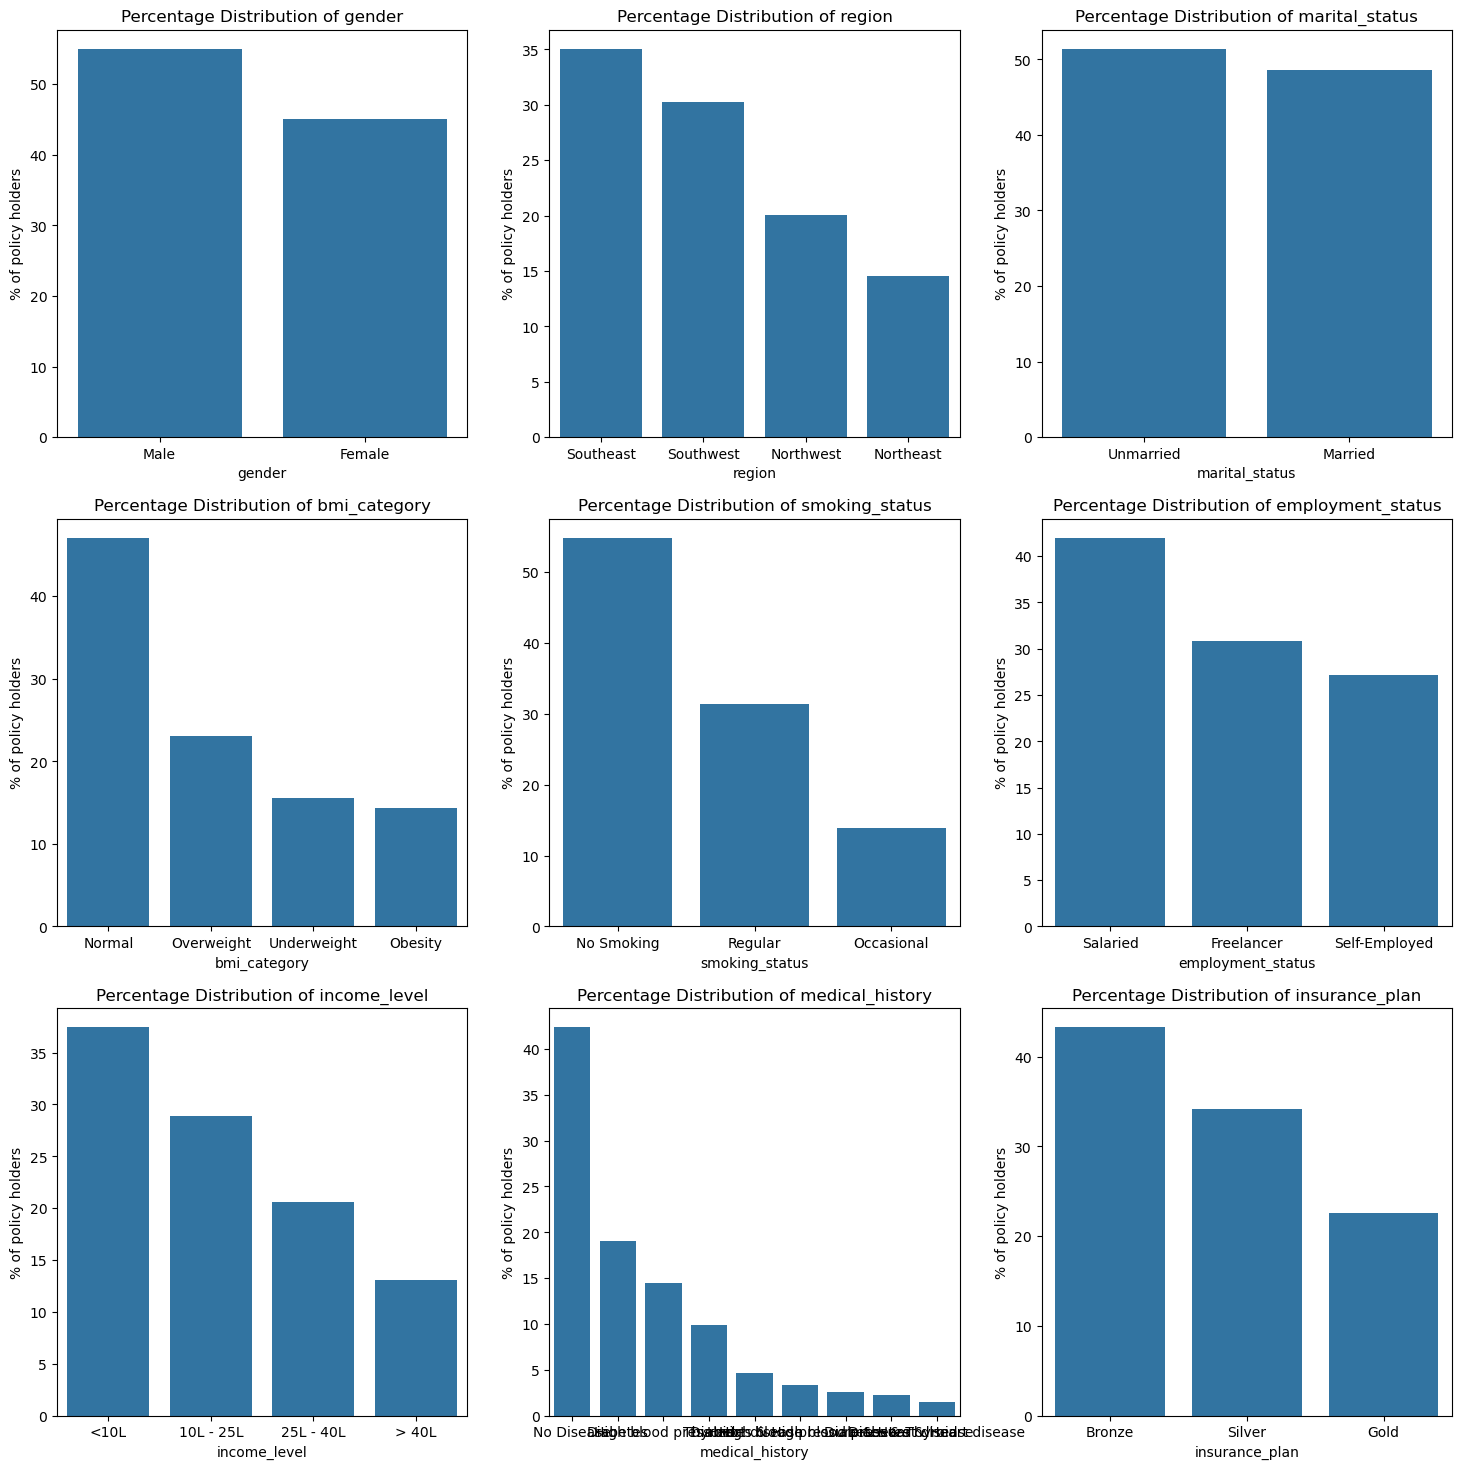

In [88]:
fig, axes = plt.subplots(3, 3, figsize=(18,18))
axes = axes.flatten()

for ax, col in zip(axes, cat_col):
    cat_count = df2[col].value_counts(normalize=True) * 100
    sbn.barplot(x=cat_count.index, y=cat_count.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("% of policy holders")

plt.show()

In [92]:
cross_tab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,326,3593,2604


<Axes: xlabel='income_level'>

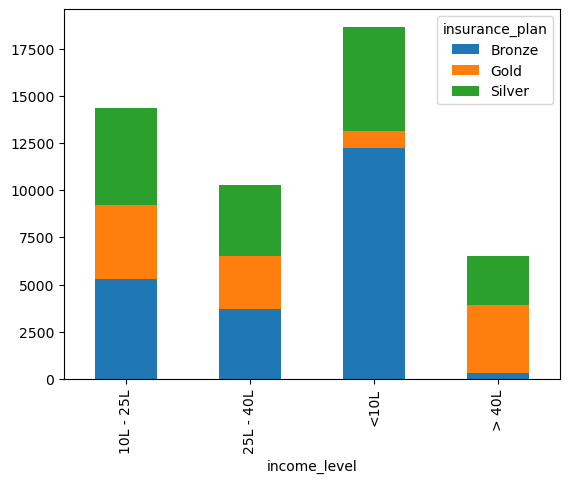

In [96]:
cross_tab.plot(kind="bar", stacked=True)

<Axes: xlabel='insurance_plan', ylabel='income_level'>

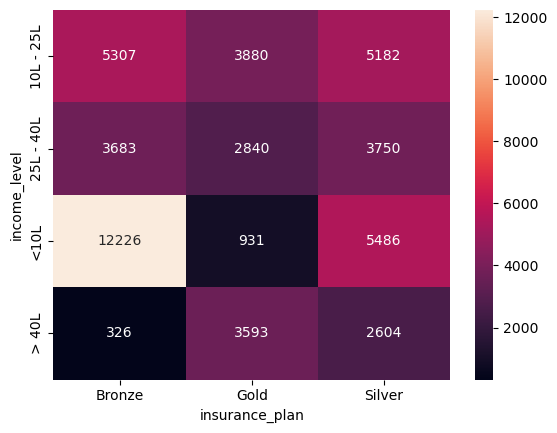

In [98]:
sbn.heatmap(cross_tab, annot=True, fmt='d')

In [100]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [116]:
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

In [118]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None


In [122]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_965/3623383084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_965/3623383084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [124]:
df2.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
13419,51,Female,Southwest,Married,3,Obesity,No Smoking,Salaried,10L - 25L,14,No Disease,Gold,28301,no disease,none,0,0.000000
18495,49,Male,Northwest,Married,3,Overweight,Occasional,Self-Employed,25L - 40L,29,Diabetes,Gold,29809,diabetes,none,6,0.428571
44973,31,Male,Southeast,Married,3,Obesity,Regular,Salaried,<10L,7,High blood pressure,Gold,29577,high blood pressure,none,6,0.428571
28287,48,Male,Northwest,Married,3,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes,Gold,30130,diabetes,none,6,0.428571
48731,62,Female,Southwest,Married,1,Normal,No Smoking,Self-Employed,10L - 25L,11,High blood pressure & Heart disease,Gold,36865,high blood pressure,heart disease,14,1.000000
14664,23,Male,Southwest,Unmarried,2,Underweight,Regular,Self-Employed,10L - 25L,19,Heart disease,Bronze,6607,heart disease,none,8,0.571429
49971,36,Female,Southwest,Married,3,Normal,No Smoking,Salaried,25L - 40L,34,No Disease,Silver,13929,no disease,none,0,0.000000
23122,44,Male,Southeast,Married,3,Overweight,Regular,Salaried,10L - 25L,11,No Disease,Silver,18818,no disease,none,0,0.000000
10738,57,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,> 40L,94,High blood pressure,Gold,29933,high blood pressure,none,6,0.428571
43145,39,Male,Southwest,Married,3,Normal,No Smoking,Salaried,10L - 25L,15,Diabetes & Heart disease,Silver,19153,diabetes,heart disease,14,1.000000


In [130]:
df2['insurance_plan'] = df2['insurance_plan'].map({
    'Bronze':1,
    'Silver':2,
    'Gold':3
})
df2['insurance_plan'].unique()

array([1, 2, 3])

In [132]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [134]:
df2['income_level'] = df2['income_level'].map({
    '<10L':1,
    '10L - 25L':2,
    '25L - 40L':3,
    '> 40L':4
})
df2['income_level'].unique()

array([1, 2, 4, 3])

In [136]:
nominal_col = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_col, drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [138]:
df4 = df3.drop(['disease1','disease2', 'total_risk_score', 'medical_history'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


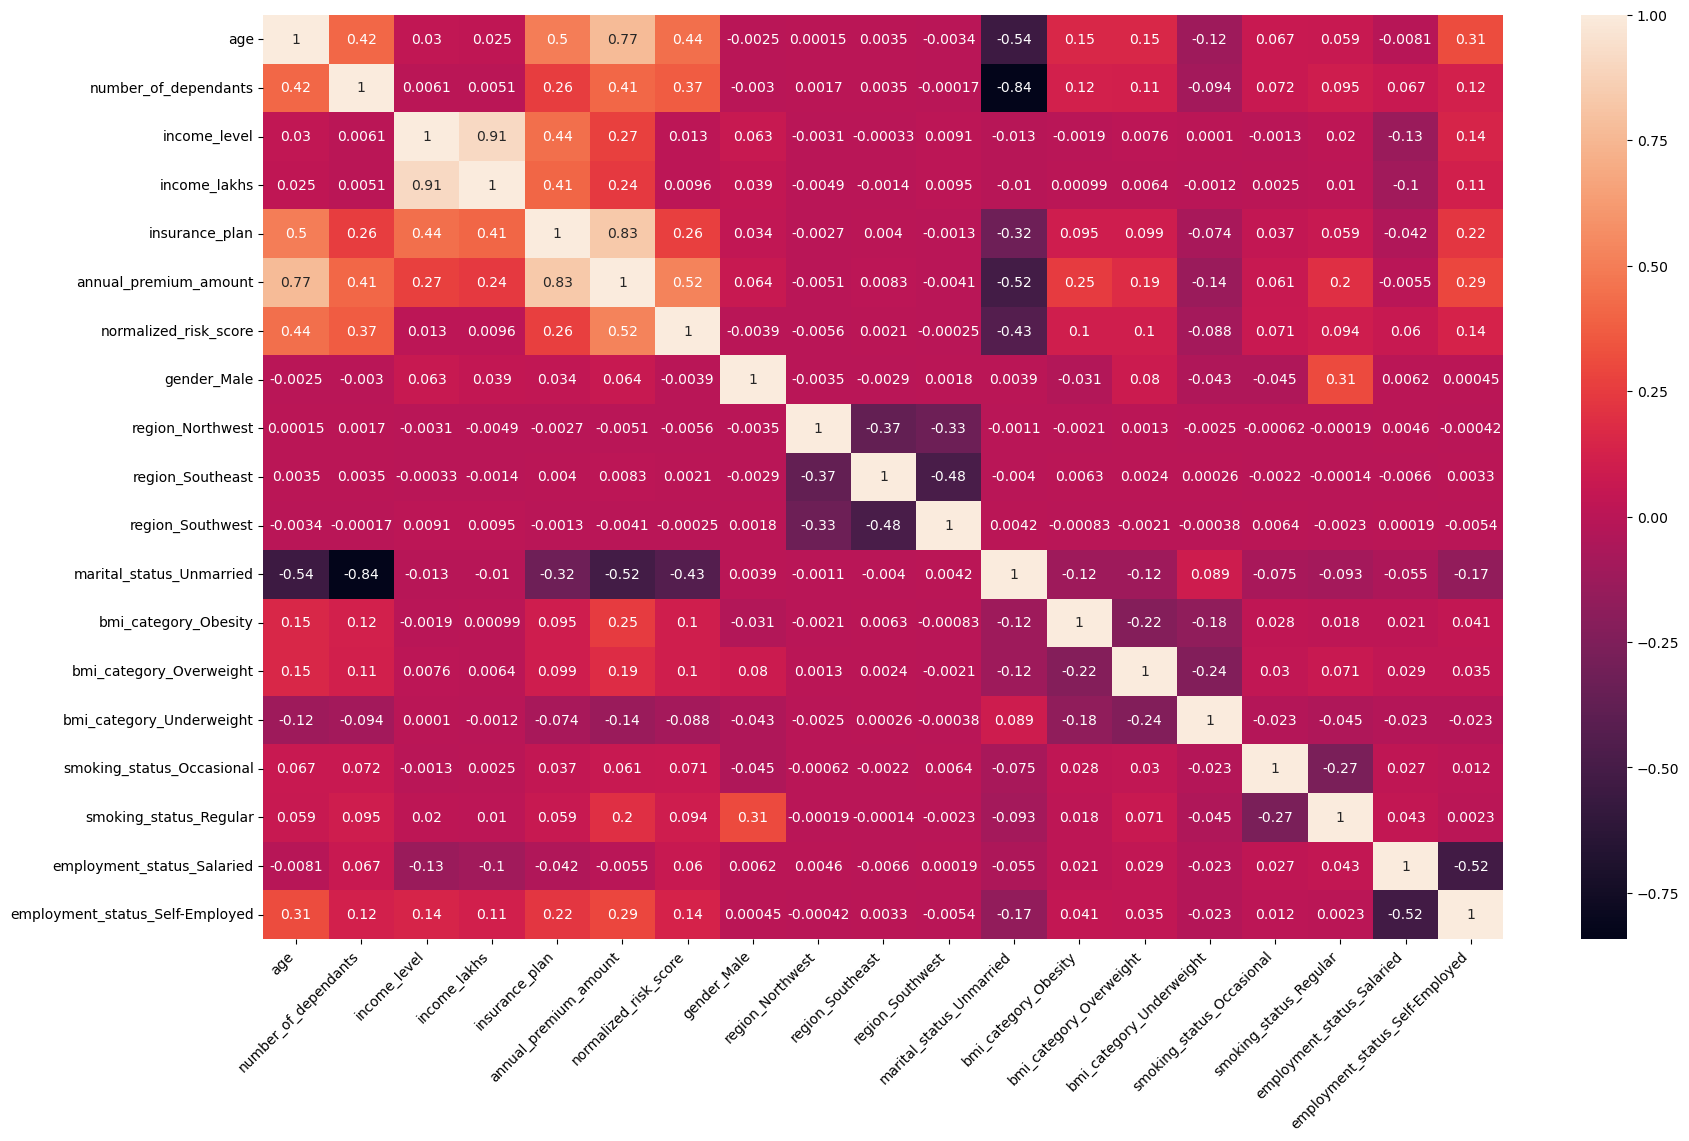

In [142]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sbn.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [144]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [148]:
X = df4.drop('annual_premium_amount', axis=1)
y= df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000
mean,0.303691,0.343443,0.364627,0.221787,0.396623,0.291816,0.549530,0.200972,0.350365,0.302963,0.513693,0.143250,0.231148,0.155276,0.138291,0.313765,0.419471,0.272004
std,0.253393,0.298411,0.348905,0.223692,0.392273,0.287456,0.497546,0.400731,0.477089,0.459544,0.499817,0.350331,0.421571,0.362171,0.345209,0.464027,0.493477,0.444997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.153061,0.500000,0.357143,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.306122,0.500000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [152]:
calculate_vif(X)

,Column,VIF
0,age,4.568203
1,number_of_dependants,4.533619
2,income_level,12.609918
3,income_lakhs,11.390919
4,insurance_plan,3.574805
5,normalized_risk_score,2.686553
6,gender_Male,2.420908
7,region_Northwest,2.101878
8,region_Southeast,2.921178
9,region_Southwest,2.669438


In [154]:
calculate_vif(X.drop('income_level', axis=1))

,Column,VIF
0,age,4.546399
1,number_of_dependants,4.526213
2,income_lakhs,2.487302
3,insurance_plan,3.438176
4,normalized_risk_score,2.686293
5,gender_Male,2.409383
6,region_Northwest,2.100181
7,region_Southeast,2.918617
8,region_Southwest,2.667140
9,marital_status_Unmarried,3.396399


In [156]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.051020,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.051020,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.193878,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.775510,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

print(train_score, test_score)

0.9282872866388545 0.9277068802881223


In [160]:
model_lr.coef_, model_lr.intercept_

(array([11320.84480976,  -598.60654635,  -387.23104353, 12445.21223389,
         4830.35511008,   141.16467047,   -19.93312597,    72.90102336,
           18.96701435,  -880.43219853,  3363.77237148,  1616.18488467,
          359.97028802,   679.17891348,  2239.27098107,   165.26365654,
          414.73816833]),
 4721.284227923472)

In [164]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
marital_status_Unmarried,-880.432199
number_of_dependants,-598.606546
income_lakhs,-387.231044
region_Northwest,-19.933126
region_Southwest,18.967014
region_Southeast,72.901023
gender_Male,141.164670
employment_status_Salaried,165.263657
bmi_category_Underweight,359.970288
employment_status_Self-Employed,414.738168


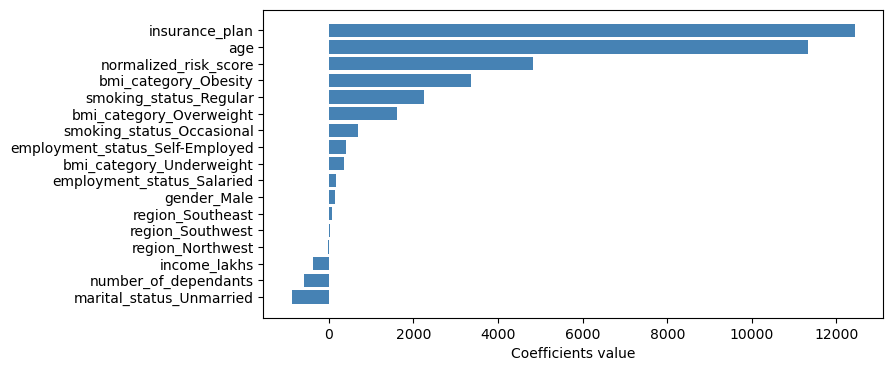

In [168]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel("Coefficients value")
plt.show()

In [172]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)
train_score = model_xg.score(X_train, y_train)
test_score = model_xg.score(X_test, y_test)
print(train_score, test_score)

0.9859131574630737 0.9812403321266174


In [178]:
y_pred = model_xg.predict(X_test)

print("R2 Score", r2_score(y_pred, y_test))
print("Mean Square Error", mean_squared_error(y_pred, y_test))
print("Root Square Error", np.sqrt(mean_squared_error(y_pred, y_test)))

R2 Score 0.9808613657951355
Mean Square Error 1332390.2512892315
Root Square Error 1154.2920996390956


In [180]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9809418519337972

In [182]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [184]:
best_model = random_search.best_estimator_

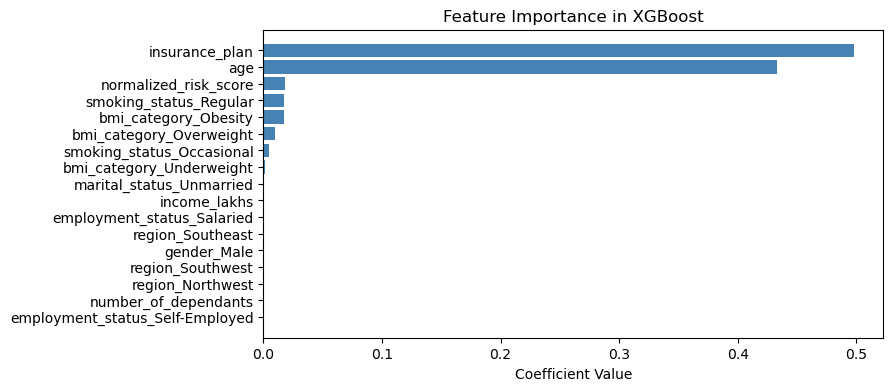

In [186]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [188]:
y_pred = best_model.predict(X_test)
residuals = y_test-y_pred
residual_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residual_pct
})
results_df.head()


,actual,predicted,diff,diff_pct
34025,6539,6582.131836,-43.131836,-0.659609
29504,11853,14702.767578,-2849.767578,-24.042585
12892,31155,30673.974609,481.025391,1.543975
34662,4395,6674.643555,-2279.643555,-51.869023
25334,19986,19694.580078,291.419922,1.458120


<Axes: xlabel='diff_pct', ylabel='Count'>

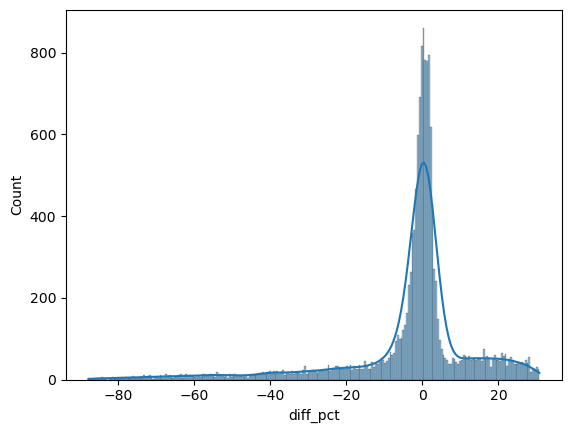

In [190]:
sbn.histplot(results_df['diff_pct'], kde=True)

In [198]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df['diff_pct'])>extreme_error_threshold]
extreme_results_df.shape

(4460, 4)

In [200]:
results_df.shape

(14943, 4)

In [206]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]

In [208]:
results_df[np.abs(results_df['diff_pct'])>50]

,actual,predicted,diff,diff_pct
34662,4395,6674.643555,-2279.643555,-51.869023
40546,3799,6674.643555,-2875.643555,-75.694750
892,5077,7807.574707,-2730.574707,-53.783232
28654,4126,6573.801758,-2447.801758,-59.326267
46497,3833,6582.131836,-2749.131836,-71.722719
...,...,...,...,...
38142,5082,7769.483887,-2687.483887,-52.882406
22937,4991,7756.181152,-2765.181152,-55.403349
17787,4987,7487.787109,-2500.787109,-50.146122
25114,4222,6756.409180,-2534.409180,-60.028640


In [212]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
29504,0.092593,0.6,0.040816,1.0,0.428571,0,0,0,1,0,0,0,0,0,0,1,0
34662,0.000000,0.6,0.102041,0.0,0.000000,1,0,0,1,0,0,0,1,0,0,0,0
7446,0.037037,0.0,0.336735,0.0,0.000000,1,1,0,0,1,0,0,1,0,1,0,0
33557,0.129630,0.0,0.367347,0.0,0.000000,1,0,0,1,1,0,0,1,1,0,0,0
15549,0.092593,0.0,0.632653,0.5,0.000000,1,0,0,1,1,0,0,0,0,1,0,1


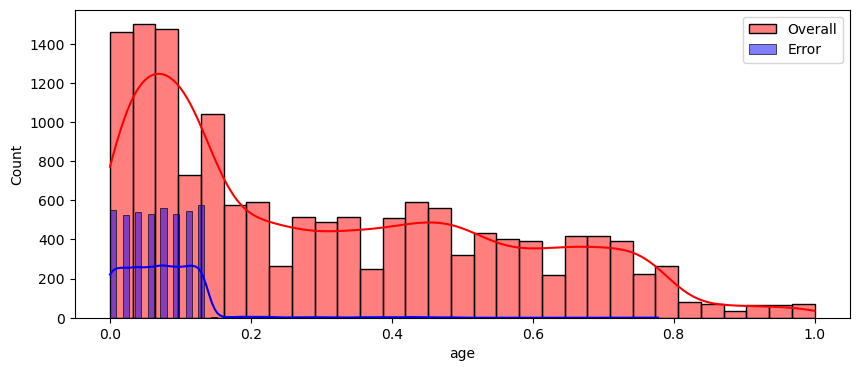

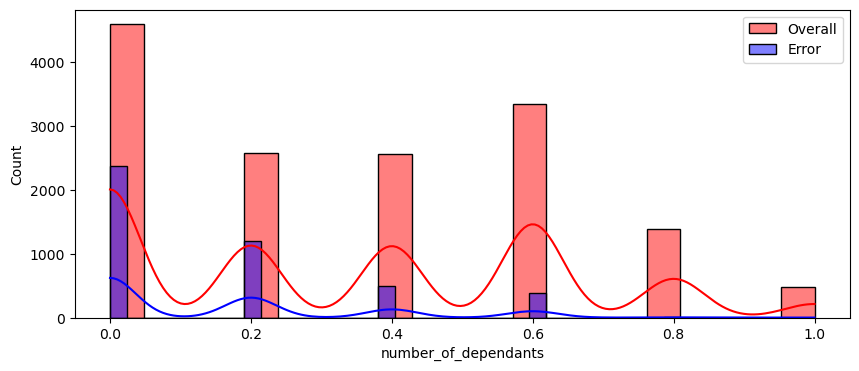

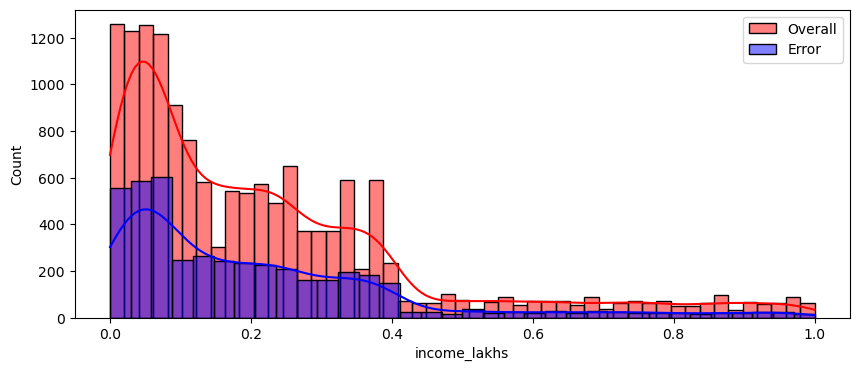

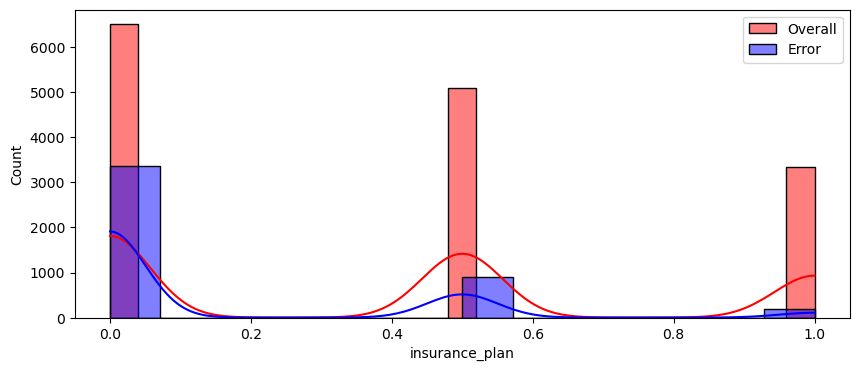

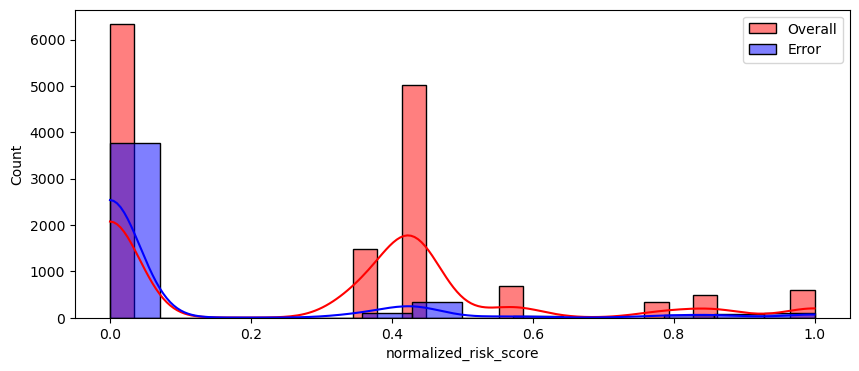

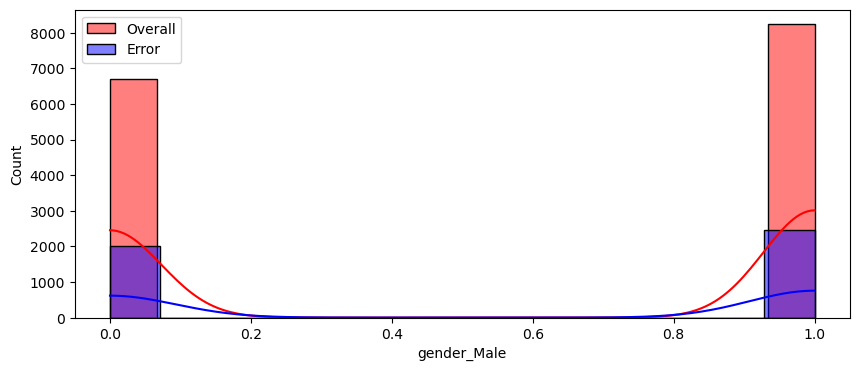

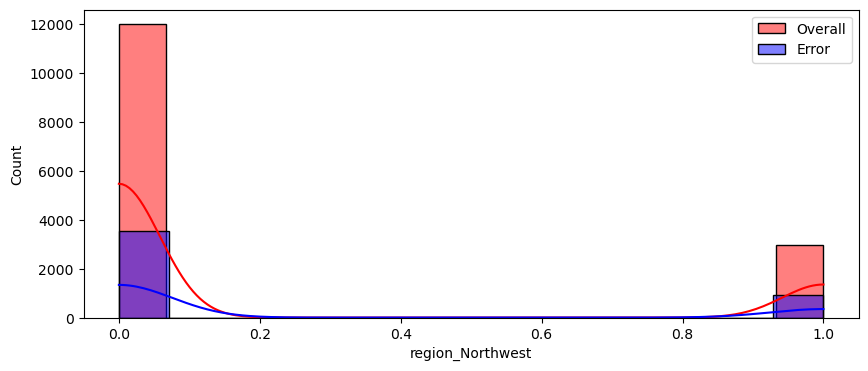

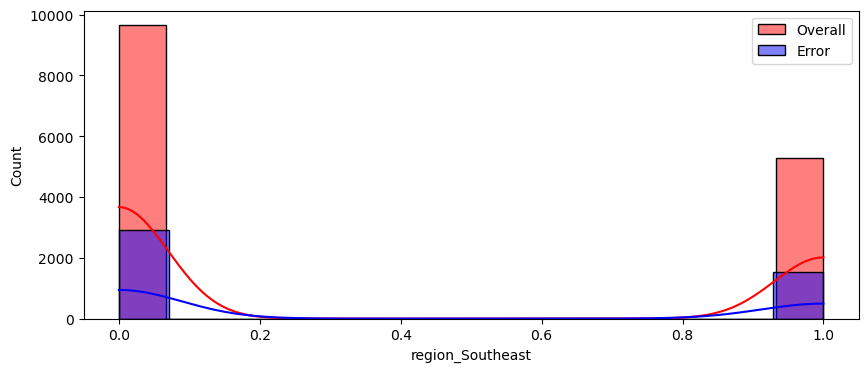

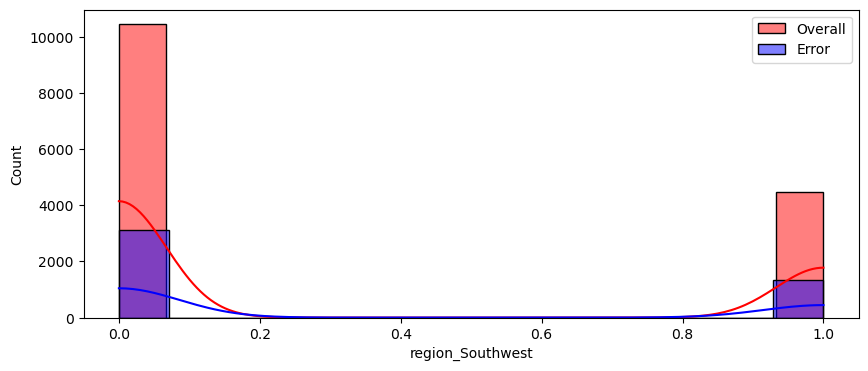

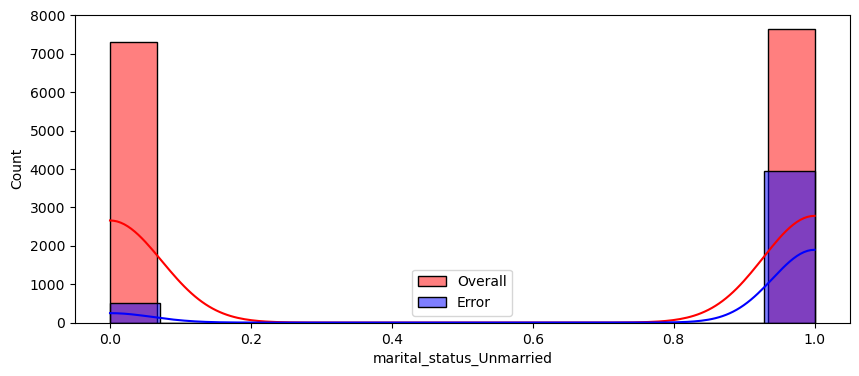

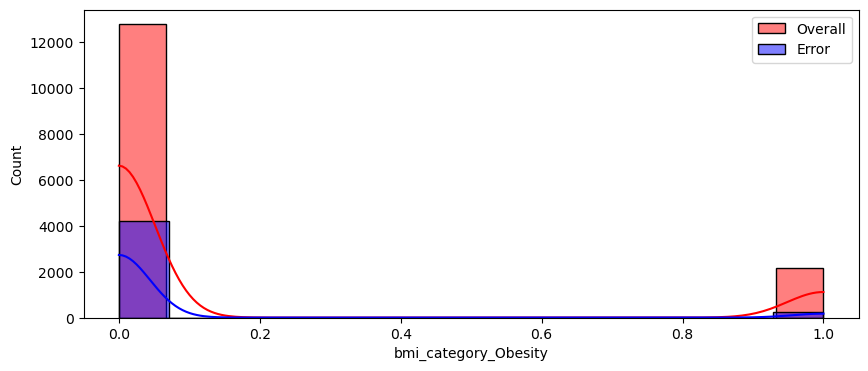

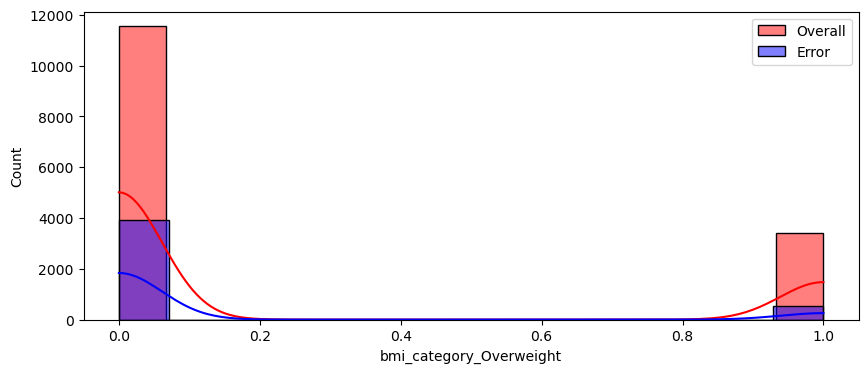

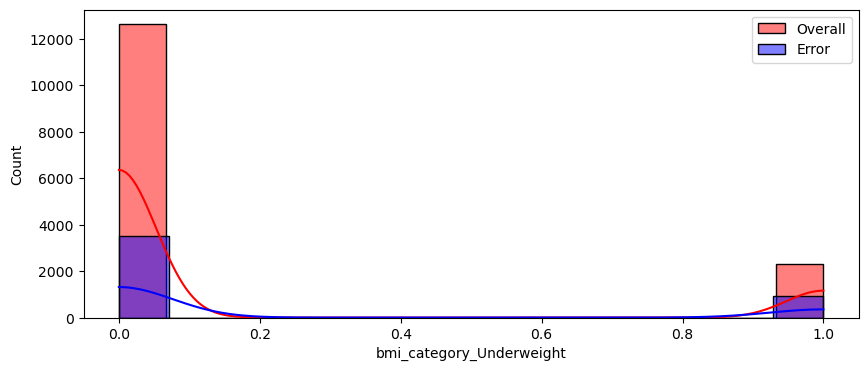

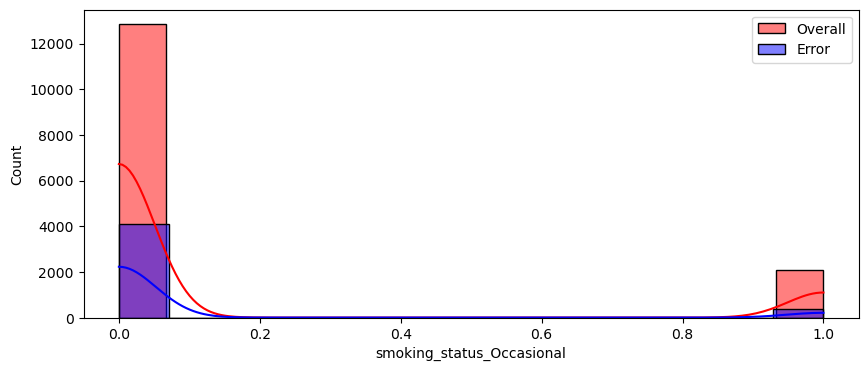

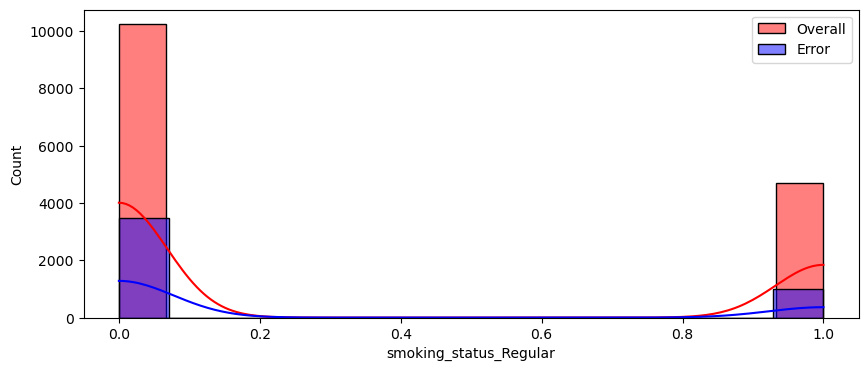

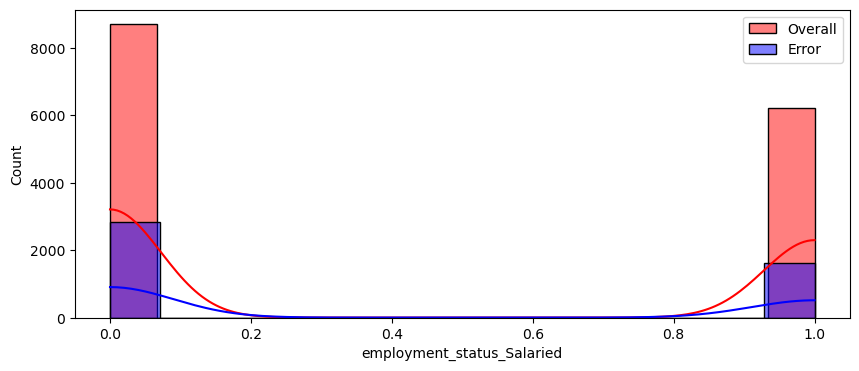

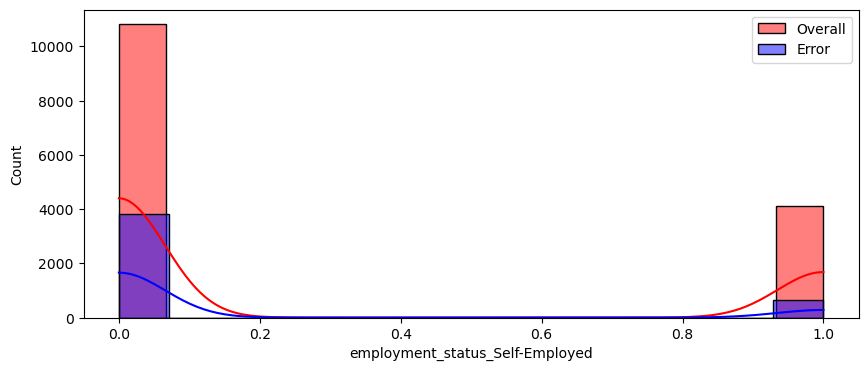

In [222]:
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sbn.histplot(X_test[feature], label='Overall',color='red', kde=True)
    sbn.histplot(extreme_errors_df[feature],label='Error', color='blue', kde=True)
    plt.legend()
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

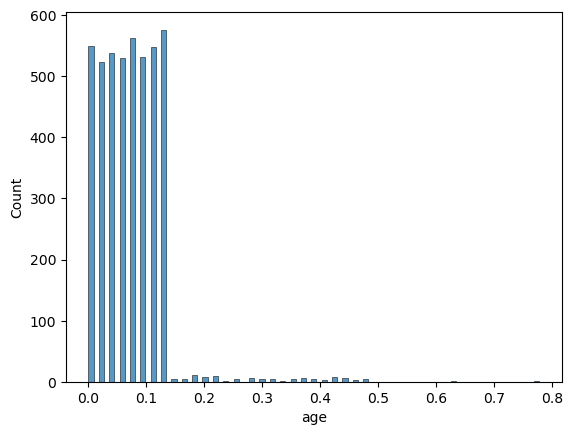

In [224]:
sbn.histplot(extreme_errors_df['age'])

In [226]:
col_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [230]:
extreme_errors_df['income_level'] = -1

In [232]:
df_reversed = pd.DataFrame()
df_reversed[col_to_scale] = scaler.inverse_transform(extreme_errors_df[col_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,3.0,-2.0,5.0,3.0
1,18.0,3.0,-2.0,11.0,1.0
2,20.0,0.0,-2.0,34.0,1.0
3,25.0,0.0,-2.0,37.0,1.0
4,23.0,0.0,-2.0,63.0,2.0


<Axes: xlabel='age', ylabel='Count'>

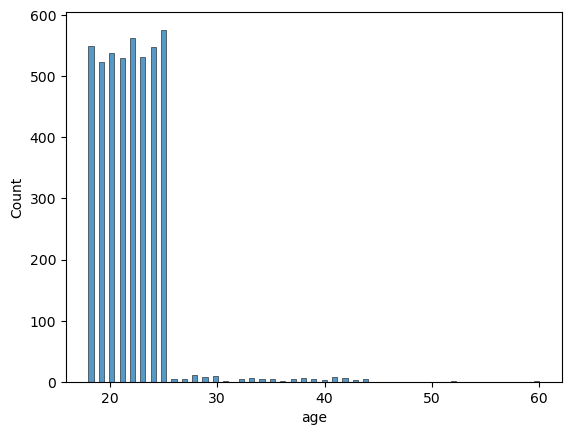

In [234]:
sbn.histplot(df_reversed['age'])

In [236]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4460.000000,4460.000000,4460.0,4460.000000,4460.000000
mean,21.841256,0.756726,-2.0,21.082735,1.287892
std,3.170904,0.977322,0.0,20.179484,0.538357
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,1.000000
max,60.000000,5.000000,-2.0,99.000000,3.000000


In [244]:
df_reversed['age'].quantile(0.98)

28.0